# 1. Bernstein polynomials

Under $x \in [0,1]$

$$
B_n(x) = \sum_{k=0}^{n} \binom{n}{k} x^k (1 - x)^{n - k} f\left( \frac{k}{n} \right)
$$

$$
B_n(x) = \sum_{k=0}^{n} b_k(x) f\left( \frac{k}{n} \right)
$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

In [38]:
def Bn(N, M, xi, f) :
    """
    When N points of the function f are known, this function computes the Bernstein polynomials of order N at M points xi.
    
    Parameters
        N : order of the basis # int
        M : number of points # int
        xi : array of points # array (M,)
        f : array of values of the function at the points xi # array (M,)
    Returns
        BN : array of values of Bernstein polynomials at the points xi # array (M,) -> sum of b_k(x) k=0,1,...,N
        bn : array of values of the basis at the points xi for each order # array (N+1, M) -> b_k(x) k=0,1,...,N
    """
    # basis
    bn = np.zeros((N+1, M))
    for i in range(N+1) :
        bn[i,:] = comb(N,i)*xi**i*(1-xi)**(N-i)
    
    # sum of the basis
    BN = 0
    for i in range(N+1) :
        BN += bn[i,:]*f[i]
    return BN, bn

## Example : $y=\sin(\pi x)$

In [52]:
goal_function = lambda x : np.sin(np.pi*x)

# Exact function
M = 1000
xi = np.linspace(0,1,M)
fexact = goal_function(xi)

# Known data given at N points
N = 10
k = np.linspace(0,N,N+1)
x = k/N
f = goal_function(x)

# Compute the Bernstein polynomials for getting the approximation of the exact function
# Using the known data, we can compute the Bernstein polynomials of order N at M points xi
BN, bn = Bn(N, M, xi, f)

## Get the basis of Bernstein polynomial

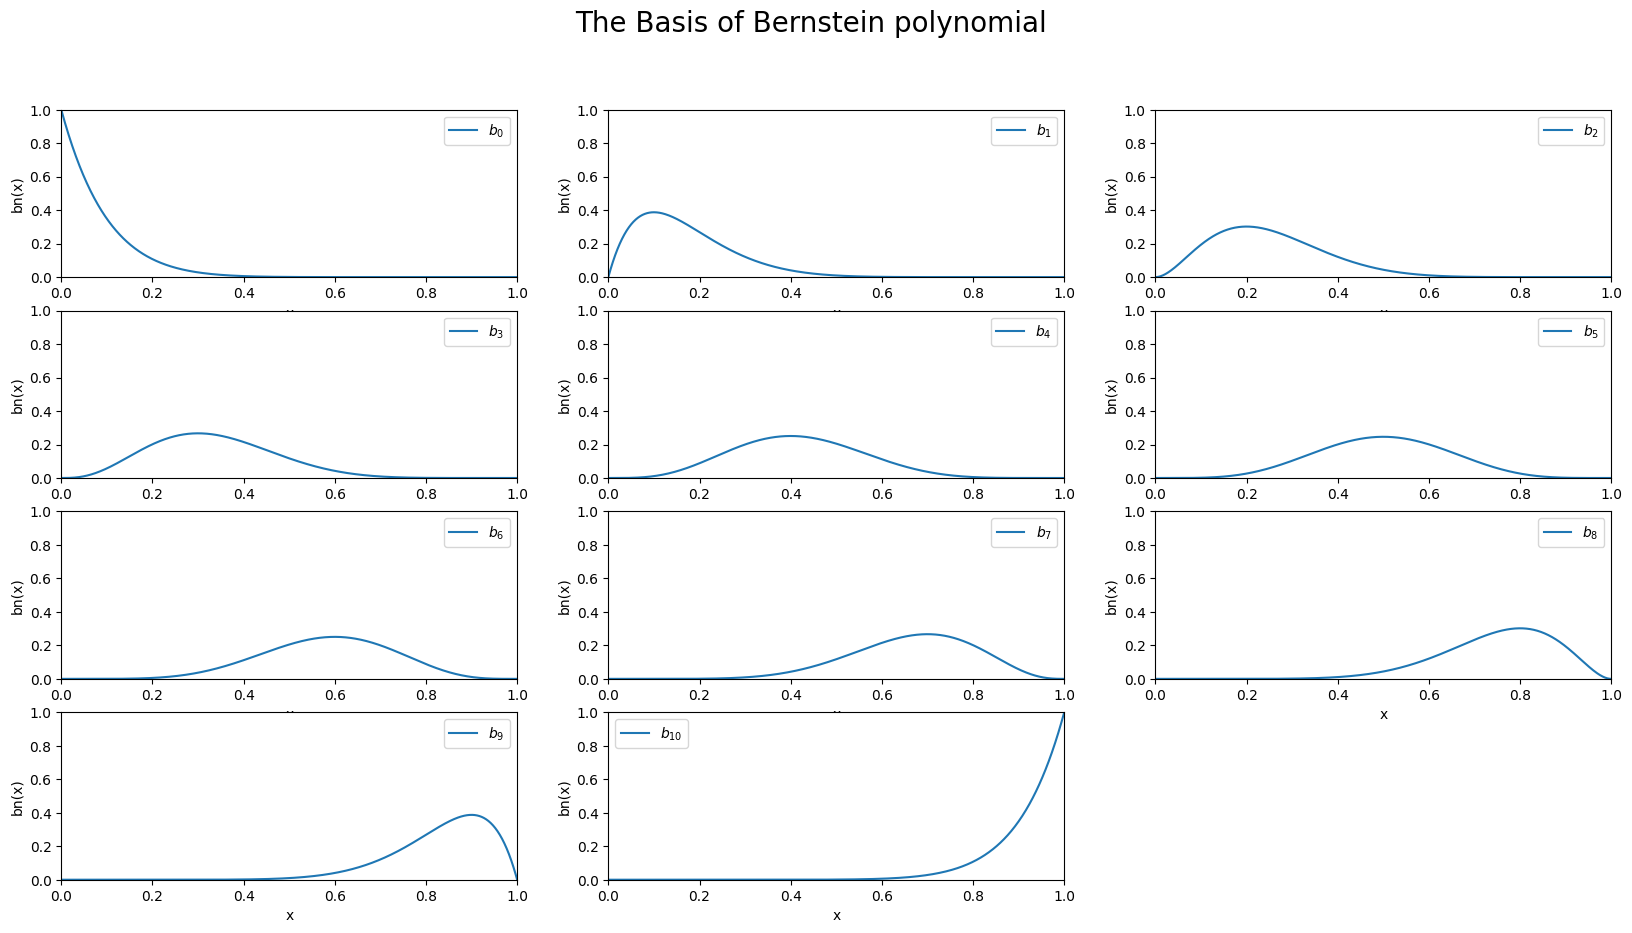

In [57]:
plt.figure(figsize=(20,5*int((N+1)/4)))
plt.suptitle('The Basis of Bernstein polynomial', fontsize=20)
for i in range(N+1) :
    plt.subplot(4, int((N+1)/4)+1, i+1)
    plt.plot(xi, bn[i], label=fr"$b_{{{i}}}$")
    plt.xlabel('x')
    plt.ylabel('bn(x)')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()
plt.show()

## In case of $y=x^2$

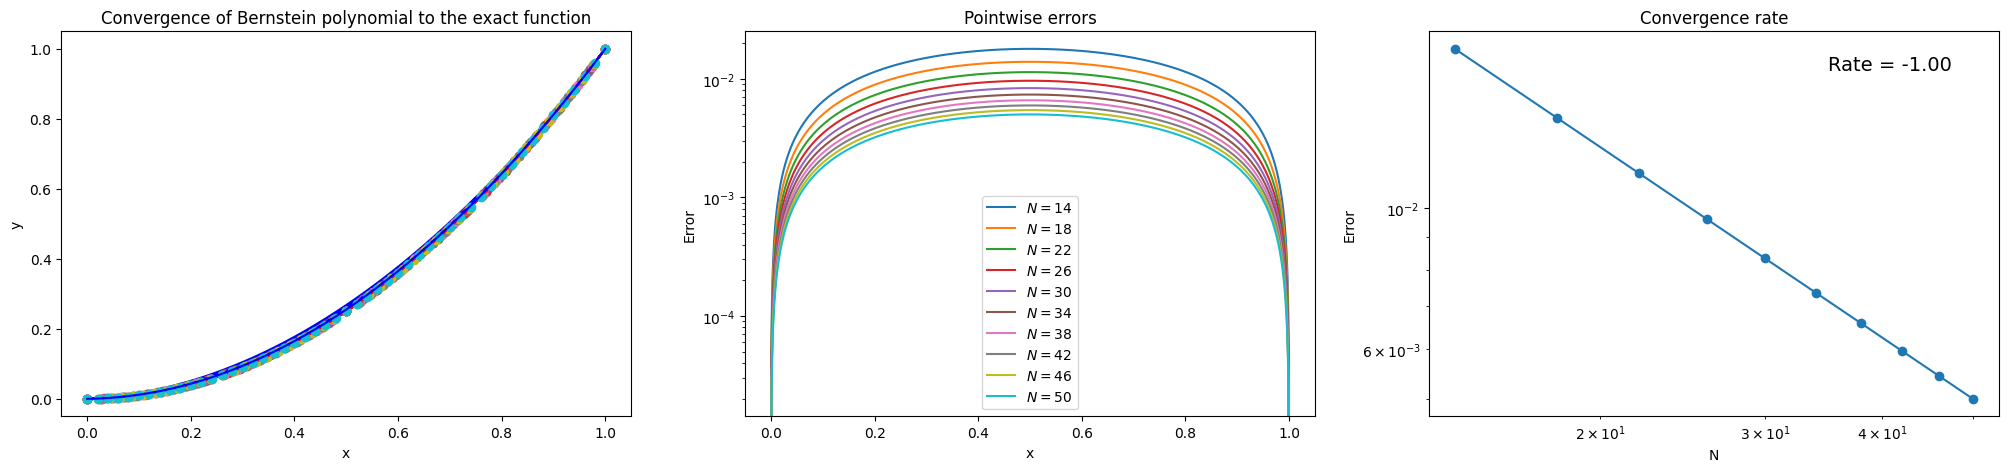

In [ ]:
# The following shows how Bn converges to f (left)
# the middle figure shows how the pointwise errors decay as N increases.
# As shown in the figure, we see the uniform convergence (middle).
# For the example, we used f(x) = x^2.
# We still see that the convergence is very slow even though convergent.

# Order of the basis
N = 10
# List of the orders of the basis
NN = []
# List of the errors for each N
Err = []
# Test function
goal_function = lambda x : x**2

# Exact function
M = 1000
xi = np.linspace(0,1,M)
fexact = goal_function(xi)

fig, axs = plt.subplots(1, 3, figsize=(25,5))

for i in range(10) :
    # Known data given at N points
    N = N + 4
    k = np.linspace(0,N,N+1)
    x = k/N
    f = goal_function(x)
    
    # Compute the Bernstein polynomials for getting the approximation of the exact function
    BN, bn = Bn(N, M, xi, f)
    
    # Plot how Bn converges to f
    axs[0].set_title('Convergence of Bernstein polynomial to the exact function')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].plot(xi, fexact, 'r-')
    axs[0].plot(x,f,'o')
    axs[0].plot(xi, BN, 'b-')
    
    # Plot the pointwise errors
    Err.append(max(abs(fexact-BN))) # L_inf norm
    NN.append(N)
    axs[1].set_title('Pointwise errors')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('Error')
    axs[1].semilogy(xi, abs(fexact-BN), label=fr"$N={N}$")
    axs[1].legend()

# Plot the convergence rate
axs[2].set_title('Convergence rate')
axs[2].set_xlabel('N')
axs[2].set_ylabel('Error')
axs[2].loglog(NN, Err, 'o-')
rate = np.polyfit(np.log10(NN), np.log10(Err), 1)
axs[2].text(0.7, 0.9, fr"Rate = {rate[0]:.2f}", transform=axs[2].transAxes, fontsize=14)

plt.show()


## In case of $y=\sin(\pi x)$

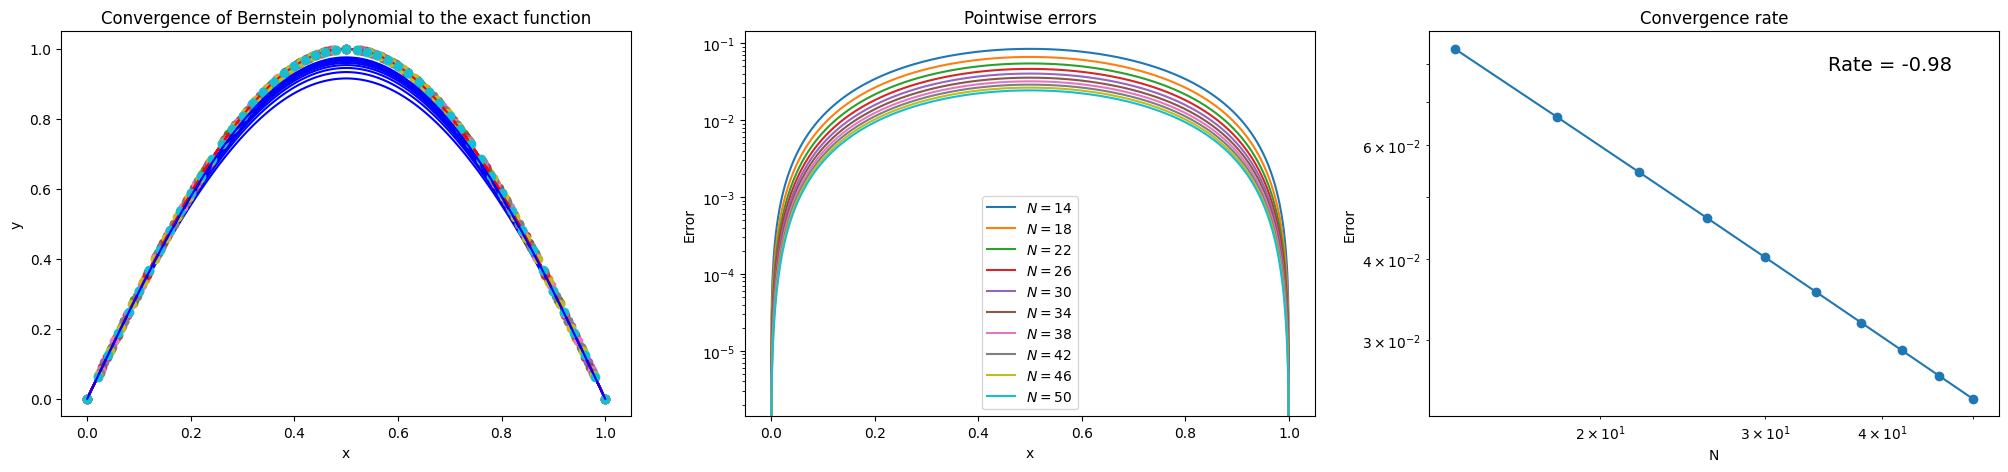

In [ ]:
# The following shows how Bn converges to f (left)
# the middle figure shows how the pointwise errors decay as N increases.
# As shown in the figure, we see the uniform convergence (middle).
# For the example, we used f(x) = x^2.
# We still see that the convergence is very slow even though convergent.

# Order of the basis
N = 10
# List of the orders of the basis
NN = []
# List of the errors for each N
Err = []
# Test function
goal_function = lambda x : np.sin(np.pi*x)

# Exact function
M = 1000
xi = np.linspace(0,1,M)
fexact = goal_function(xi)

fig, axs = plt.subplots(1, 3, figsize=(25,5))

for i in range(10) :
    # Known data given at N points
    N = N + 4
    k = np.linspace(0,N,N+1)
    x = k/N
    f = goal_function(x)
    
    # Compute the Bernstein polynomials for getting the approximation of the exact function
    BN, bn = Bn(N, M, xi, f)
    
    # Plot how Bn converges to f
    axs[0].set_title('Convergence of Bernstein polynomial to the exact function')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].plot(xi, fexact, 'r-')
    axs[0].plot(x,f,'o')
    axs[0].plot(xi, BN, 'b-')
    
    # Plot the pointwise errors
    Err.append(max(abs(fexact-BN))) # L_inf norm
    NN.append(N)
    axs[1].set_title('Pointwise errors')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('Error')
    axs[1].semilogy(xi, abs(fexact-BN), label=fr"$N={N}$")
    axs[1].legend()

# Plot the convergence rate
axs[2].set_title('Convergence rate')
axs[2].set_xlabel('N')
axs[2].set_ylabel('Error')
axs[2].loglog(NN, Err, 'o-')
rate = np.polyfit(np.log10(NN), np.log10(Err), 1)
axs[2].text(0.7, 0.9, fr"Rate = {rate[0]:.2f}", transform=axs[2].transAxes, fontsize=14)

plt.show()


## In case of $f_R(x) = \frac{1}{1 + 25(2x - 1)^2}$ with $L_{\infty}$

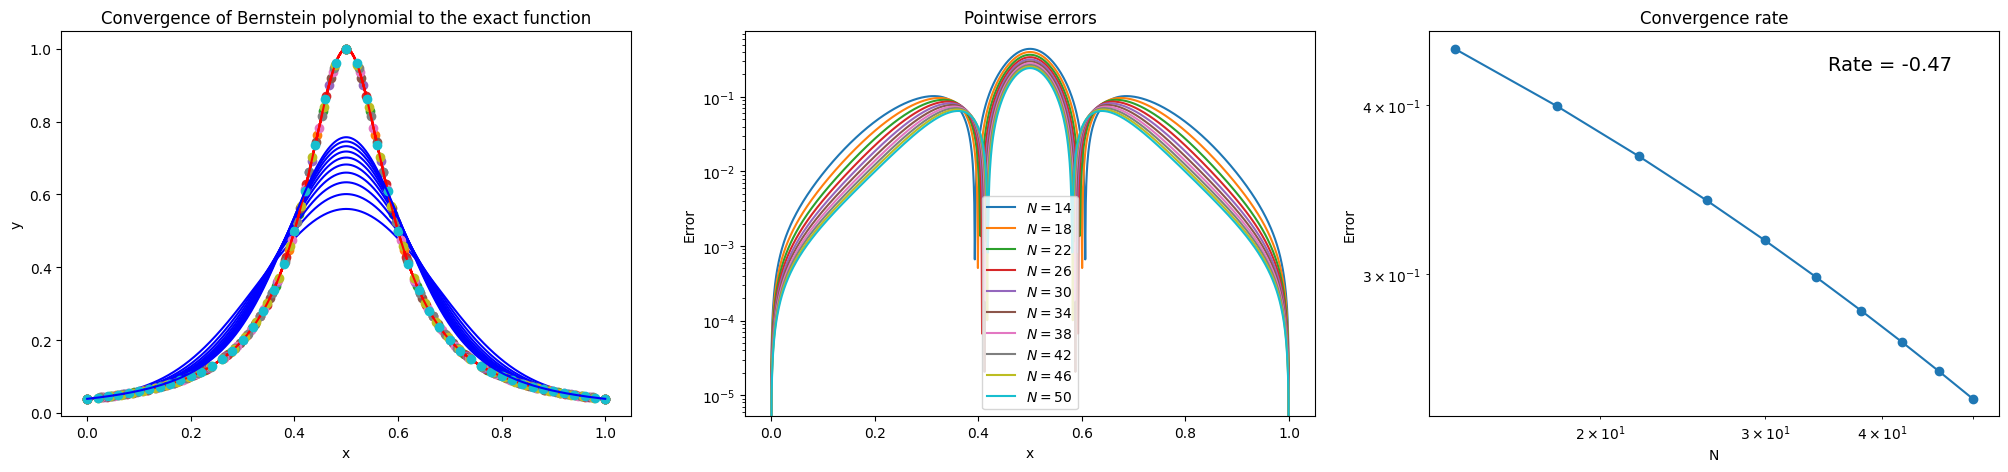

In [69]:
# The following shows how Bn converges to f (left)
# the middle figure shows how the pointwise errors decay as N increases.
# As shown in the figure, we see the uniform convergence (middle).
# For the example, we used f(x) = x^2.
# We still see that the convergence is very slow even though convergent.

# Order of the basis
N = 10
# List of the orders of the basis
NN = []
# List of the errors for each N
Err = []
# Test function
goal_function = lambda x : 1/(1+25*(2*x-1)**2)

# Exact function
M = 1000
xi = np.linspace(0,1,M)
fexact = goal_function(xi)

fig, axs = plt.subplots(1, 3, figsize=(25,5))

for i in range(10) :
    # Known data given at N points
    N = N + 4
    k = np.linspace(0,N,N+1)
    x = k/N
    f = goal_function(x)
    
    # Compute the Bernstein polynomials for getting the approximation of the exact function
    BN, bn = Bn(N, M, xi, f)
    
    # Plot how Bn converges to f
    axs[0].set_title('Convergence of Bernstein polynomial to the exact function')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].plot(xi, fexact, 'r-')
    axs[0].plot(x,f,'o')
    axs[0].plot(xi, BN, 'b-')
    
    # Plot the pointwise errors
    Err.append(max(abs(fexact-BN))) # L_inf norm
    NN.append(N)
    axs[1].set_title('Pointwise errors')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('Error')
    axs[1].semilogy(xi, abs(fexact-BN), label=fr"$N={N}$")
    axs[1].legend()

# Plot the convergence rate
axs[2].set_title('Convergence rate')
axs[2].set_xlabel('N')
axs[2].set_ylabel('Error')
axs[2].loglog(NN, Err, 'o-')
rate = np.polyfit(np.log10(NN), np.log10(Err), 1)
axs[2].text(0.7, 0.9, fr"Rate = {rate[0]:.2f}", transform=axs[2].transAxes, fontsize=14)

plt.show()


## In case of $f_R(x) = \frac{1}{1 + 25(2x - 1)^2}$ with $L_{2}$

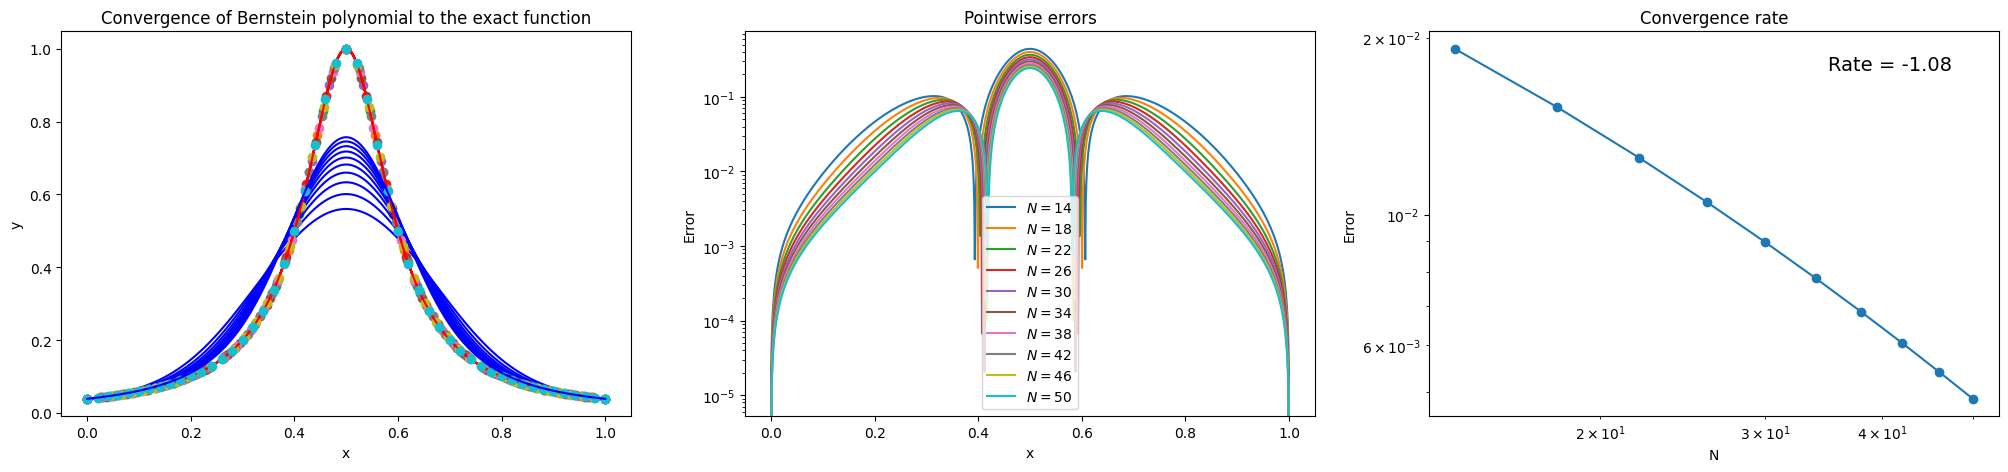

In [70]:
# The following shows how Bn converges to f (left)
# the middle figure shows how the pointwise errors decay as N increases.
# As shown in the figure, we see the uniform convergence (middle).
# For the example, we used f(x) = x^2.
# We still see that the convergence is very slow even though convergent.

# Order of the basis
N = 10
# List of the orders of the basis
NN = []
# List of the errors for each N
Err = []
# Test function
goal_function = lambda x : 1/(1+25*(2*x-1)**2)

# Exact function
M = 1000
xi = np.linspace(0,1,M)
fexact = goal_function(xi)

fig, axs = plt.subplots(1, 3, figsize=(25,5))

for i in range(10) :
    # Known data given at N points
    N = N + 4
    k = np.linspace(0,N,N+1)
    x = k/N
    f = goal_function(x)
    
    # Compute the Bernstein polynomials for getting the approximation of the exact function
    BN, bn = Bn(N, M, xi, f)
    
    # Plot how Bn converges to f
    axs[0].set_title('Convergence of Bernstein polynomial to the exact function')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].plot(xi, fexact, 'r-')
    axs[0].plot(x,f,'o')
    axs[0].plot(xi, BN, 'b-')
    
    # Plot the pointwise errors
    Err.append(np.mean((fexact-BN)**2)) # L_2
    NN.append(N)
    axs[1].set_title('Pointwise errors')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('Error')
    axs[1].semilogy(xi, abs(fexact-BN), label=fr"$N={N}$")
    axs[1].legend()

# Plot the convergence rate
axs[2].set_title('Convergence rate')
axs[2].set_xlabel('N')
axs[2].set_ylabel('Error')
axs[2].loglog(NN, Err, 'o-')
rate = np.polyfit(np.log10(NN), np.log10(Err), 1)
axs[2].text(0.7, 0.9, fr"Rate = {rate[0]:.2f}", transform=axs[2].transAxes, fontsize=14)

plt.show()


## In case of
$$
f_d(x) =
\begin{cases}
1, & x < \dfrac{1}{2} \\
-1, & x \ge \dfrac{1}{2}
\end{cases}
$$

## with $L_{\infty}$

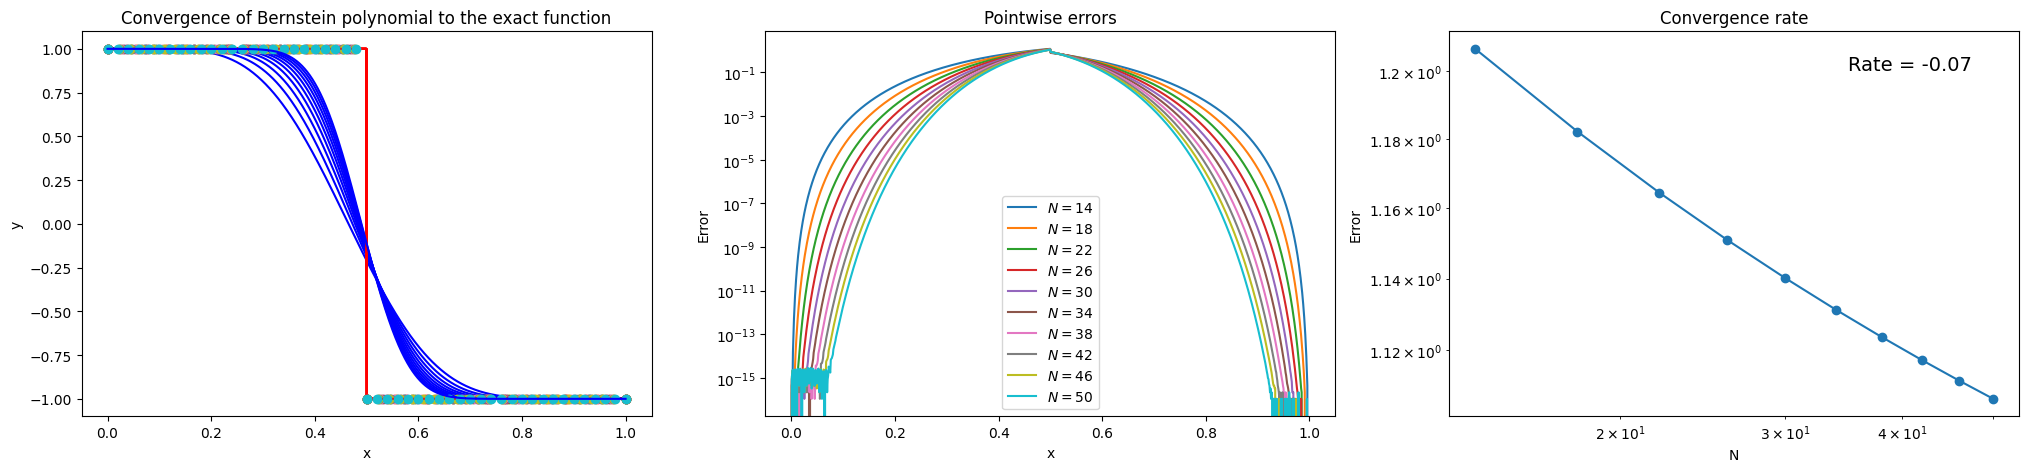

In [74]:
# The following shows how Bn converges to f (left)
# the middle figure shows how the pointwise errors decay as N increases.
# As shown in the figure, we see the uniform convergence (middle).
# For the example, we used f(x) = x^2.
# We still see that the convergence is very slow even though convergent.

# Order of the basis
N = 10
# List of the orders of the basis
NN = []
# List of the errors for each N
Err = []
# Test function
def f_d(x):
    x = np.asarray(x)  # 배열로 변환 (리스트 넣어도 됨)
    return np.where(x < 0.5, 1, -1)
    
goal_function = lambda x :f_d(x)

# Exact function
M = 1000
xi = np.linspace(0,1,M)
fexact = goal_function(xi)

fig, axs = plt.subplots(1, 3, figsize=(25,5))

for i in range(10) :
    # Known data given at N points
    N = N + 4
    k = np.linspace(0,N,N+1)
    x = k/N
    f = goal_function(x)
    
    # Compute the Bernstein polynomials for getting the approximation of the exact function
    BN, bn = Bn(N, M, xi, f)
    
    # Plot how Bn converges to f
    axs[0].set_title('Convergence of Bernstein polynomial to the exact function')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].plot(xi, fexact, 'r-')
    axs[0].plot(x,f,'o')
    axs[0].plot(xi, BN, 'b-')
    
    # Plot the pointwise errors
    Err.append(max(abs(fexact-BN))) # L_inf norm
    NN.append(N)
    axs[1].set_title('Pointwise errors')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('Error')
    axs[1].semilogy(xi, abs(fexact-BN), label=fr"$N={N}$")
    axs[1].legend()

# Plot the convergence rate
axs[2].set_title('Convergence rate')
axs[2].set_xlabel('N')
axs[2].set_ylabel('Error')
axs[2].loglog(NN, Err, 'o-')
rate = np.polyfit(np.log10(NN), np.log10(Err), 1)
axs[2].text(0.7, 0.9, fr"Rate = {rate[0]:.2f}", transform=axs[2].transAxes, fontsize=14)

plt.show()


## In case of
$$
f_d(x) =
\begin{cases}
1, & x < \dfrac{1}{2} \\
-1, & x \ge \dfrac{1}{2}
\end{cases}
$$

## with $L_{2}$

0.1353236196459378
0.1173811378102082
0.10501846146021768
0.09585480832409632
0.08871959547324323
0.08296356758374933
0.07819460662905618
0.07416036072449374
0.07069022683258461
0.0676642421334636


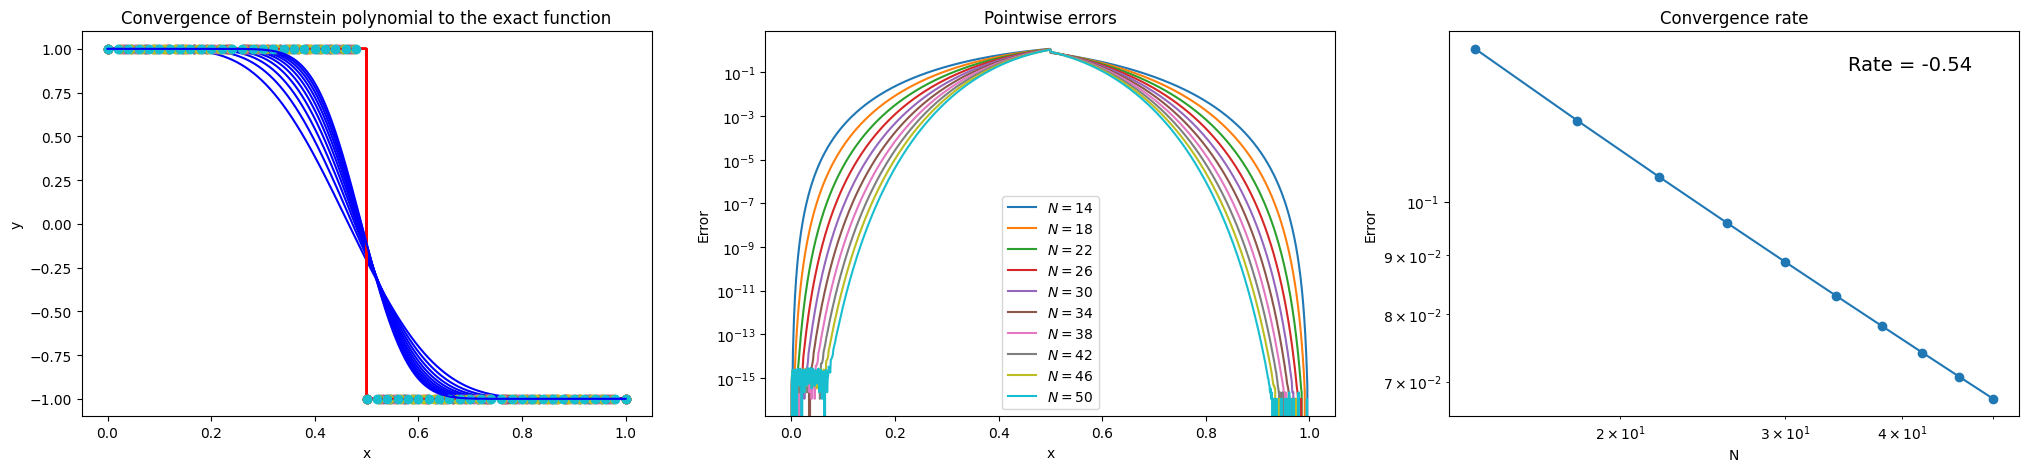

In [ ]:
# The following shows how Bn converges to f (left)
# the middle figure shows how the pointwise errors decay as N increases.
# As shown in the figure, we see the uniform convergence (middle).
# For the example, we used f(x) = x^2.
# We still see that the convergence is very slow even though convergent.

# Order of the basis
N = 10
# List of the orders of the basis
NN = []
# List of the errors for each N
Err = []
# Test function
def f_d(x):
    x = np.asarray(x)  # 배열로 변환 (리스트 넣어도 됨)
    return np.where(x < 0.5, 1, -1)
    
goal_function = lambda x :f_d(x)

# Exact function
M = 1000
xi = np.linspace(0,1,M)
fexact = goal_function(xi)

fig, axs = plt.subplots(1, 3, figsize=(25,5))

for i in range(10) :
    # Known data given at N points
    N = N + 4
    k = np.linspace(0,N,N+1)
    x = k/N
    f = goal_function(x)
    
    # Compute the Bernstein polynomials for getting the approximation of the exact function
    BN, bn = Bn(N, M, xi, f)
    
    # Plot how Bn converges to f
    axs[0].set_title('Convergence of Bernstein polynomial to the exact function')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].plot(xi, fexact, 'r-')
    axs[0].plot(x,f,'o')
    axs[0].plot(xi, BN, 'b-')
    
    # Plot the pointwise errors
    Err.append(np.mean((fexact-BN)**2)) # L_2
    NN.append(N)
    axs[1].set_title('Pointwise errors')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('Error')
    axs[1].semilogy(xi, abs(fexact-BN), label=fr"$N={N}$")
    axs[1].legend()

# Plot the convergence rate
axs[2].set_title('Convergence rate')
axs[2].set_xlabel('N')
axs[2].set_ylabel('Error')
axs[2].loglog(NN, Err, 'o-')
rate = np.polyfit(np.log10(NN), np.log10(Err), 1)
axs[2].text(0.7, 0.9, fr"Rate = {rate[0]:.2f}", transform=axs[2].transAxes, fontsize=14)

plt.show()
